In [1]:
import sys
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot 

level = 'andamento-nazionale'

path_data = '../data'
path_img_root =  '{path_data}/imgs/grafici/{level}'.format(path_data=path_data, level=level)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/covid19-{level}.csv'.format(path_csv=path_csv, level=level)

In [2]:
df_n_raw = pd.read_csv(csv_in_name)
df_n_raw;
df_n_raw.columns

Index(['data', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati',
       'variazione_terapia_intensiva', 'variazione_ricoverati_con_sintomi',
       'variazione_totale_ospedalizzati', 'variazione_isolamento_domiciliare',
       'nuovi_dimessi_guariti', 'nuovi_deceduti', 'nuovi_tamponi',
       'nuovi_casi_testati', 'ti_su_to', 'to_su_tp', 'np_su_nt', 'np_su_nct',
       'var_ti_perc', 'var_pos_perc'],
      dtype='object')

In [3]:
# df_n[-2:].iloc[:, 1:]
df_last = df_n_raw[-1:]

In [4]:
type(df_last['nuovi_positivi'].item())

int

In [5]:
# Print stats
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 28337
Nuovi tamponi: 188747.0
Percentuale nuovi positivi/nuovi tamponi: 15.0 %
Nuovi guariti: 13574.0
Nuovi deceduti: 562.0
Variazione positivi ricoverati con sintomi: 216.0
Variazione positivi in terapia intensiva: 43.0
Variazione positivi in isolamento dimiciliare: 13942.0


In [6]:
last_date = datetime.datetime.fromisoformat(df_n_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 22, 17, 0)

In [7]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-23T17:00:00,2658,244,2902,43212,46114,625,1640,220665,35758,...,995.0,20.0,103696.0,63763.0,8.41,6.29,1.58,2.57,2.09,3.605
1,2020-09-24T17:00:00,2731,246,2977,43803,46780,666,1786,221762,35781,...,1097.0,23.0,108019.0,64899.0,8.26,6.36,1.65,2.75,0.82,3.873
2,2020-09-25T17:00:00,2737,244,2981,44737,47718,938,1912,222716,35801,...,954.0,20.0,107269.0,64009.0,8.19,6.25,1.78,2.99,-0.81,4.087
3,2020-09-26T17:00:00,2746,247,2993,45600,48593,875,1869,223693,35818,...,977.0,17.0,104387.0,62025.0,8.25,6.16,1.79,3.01,1.23,3.917
4,2020-09-27T17:00:00,2846,254,3100,46518,49618,1025,1766,224417,35835,...,724.0,17.0,87714.0,53737.0,8.19,6.25,2.01,3.29,2.83,3.634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-18T17:00:00,33504,3670,37174,705994,743168,9358,34282,481967,47217,...,24169.0,753.0,234834.0,124237.0,9.87,5.00,14.60,27.59,1.61,4.672
57,2020-11-19T17:00:00,33610,3712,37322,724349,761671,18503,36176,498987,47870,...,17020.0,653.0,250186.0,138397.0,9.95,4.90,14.46,26.14,1.14,4.868
58,2020-11-20T17:00:00,33957,3748,37705,739471,777176,15505,37242,520022,48569,...,21035.0,699.0,238077.0,116853.0,9.94,4.85,15.64,31.87,0.97,4.890
59,2020-11-21T17:00:00,34063,3758,37821,753925,791746,14570,34767,539524,49261,...,19502.0,692.0,237225.0,121315.0,9.94,4.78,14.66,28.66,0.27,4.474


In [8]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df_n, 'data', graph_prop)

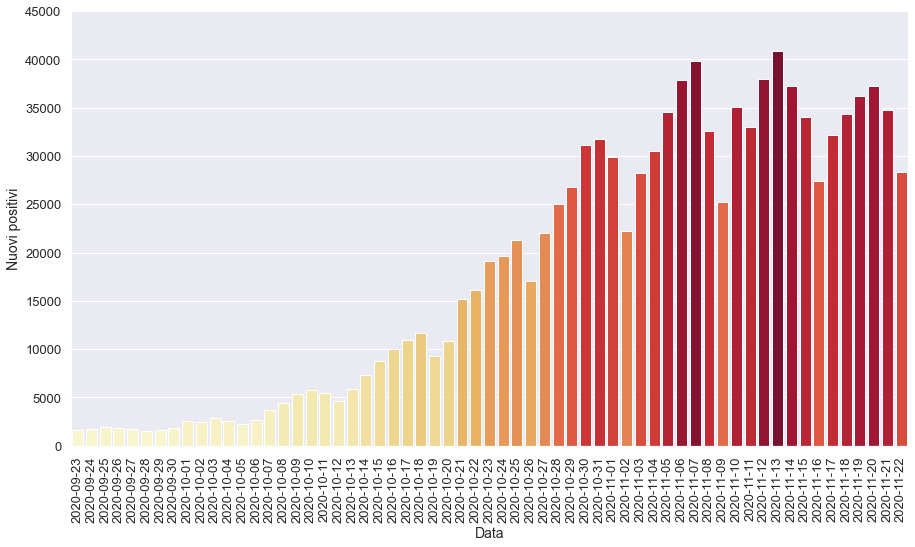

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

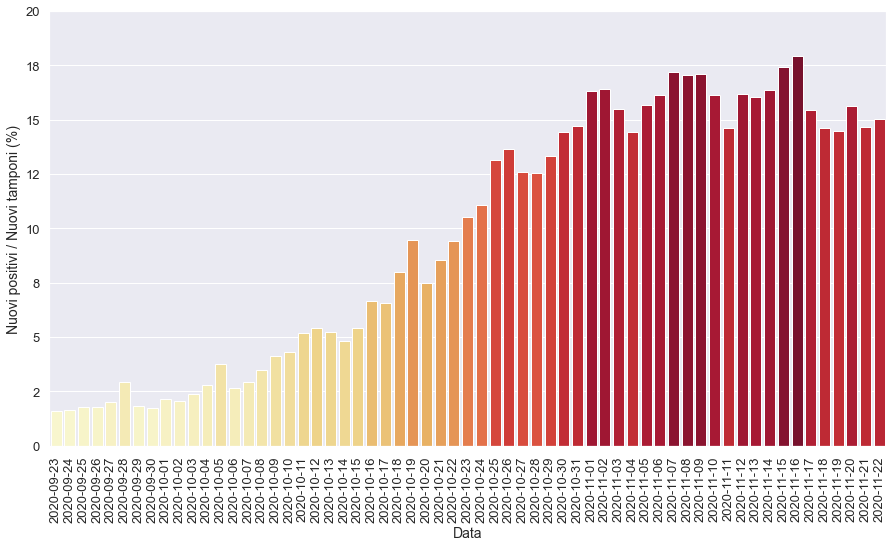

In [10]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

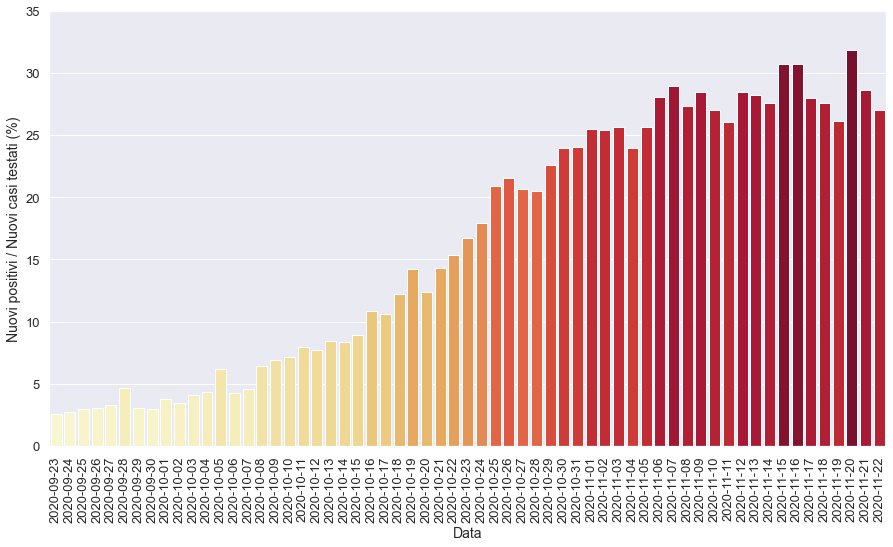

In [11]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

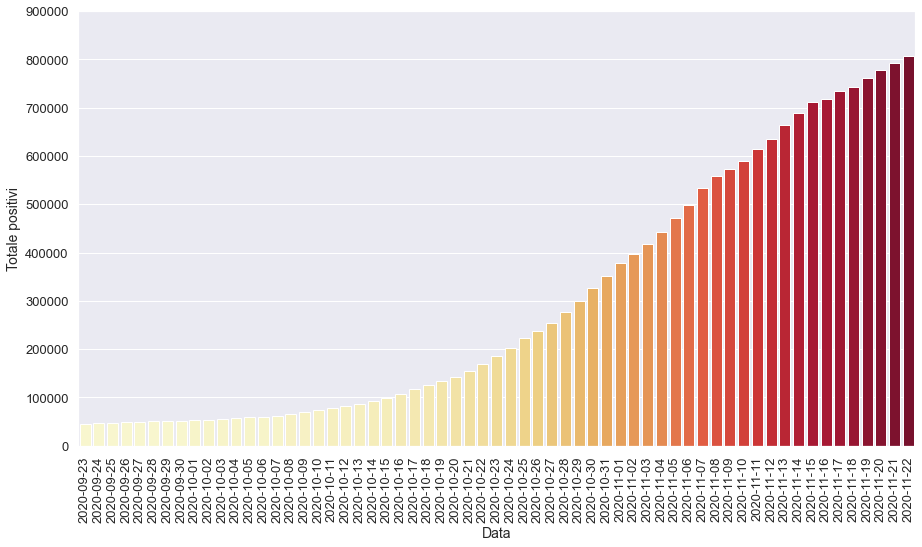

In [12]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

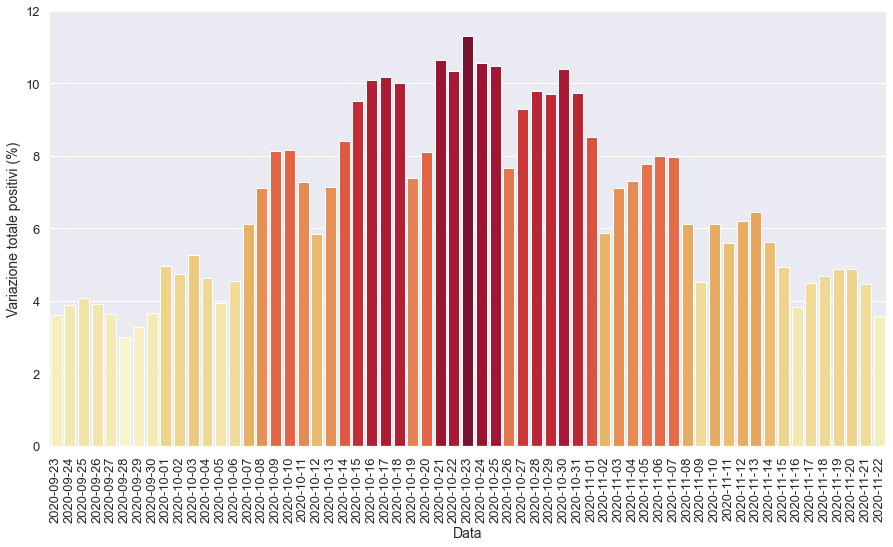

In [13]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

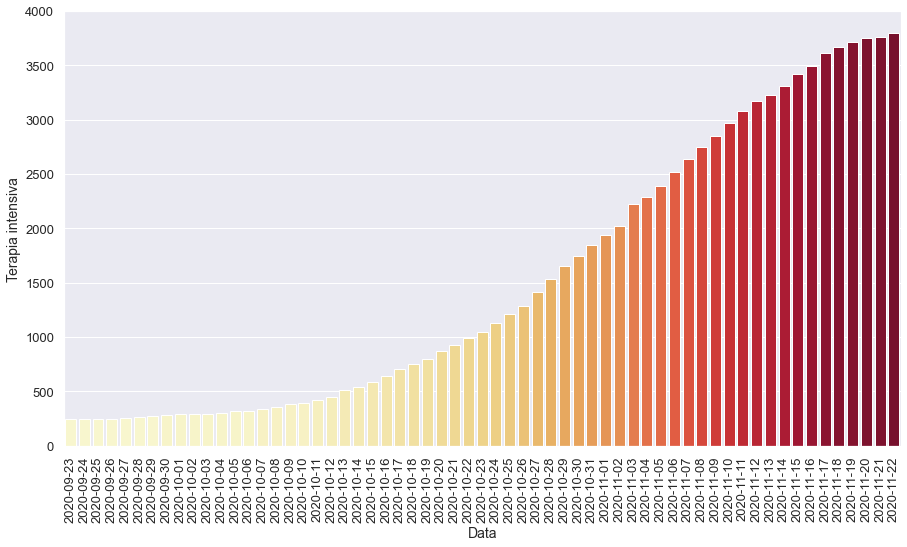

In [14]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

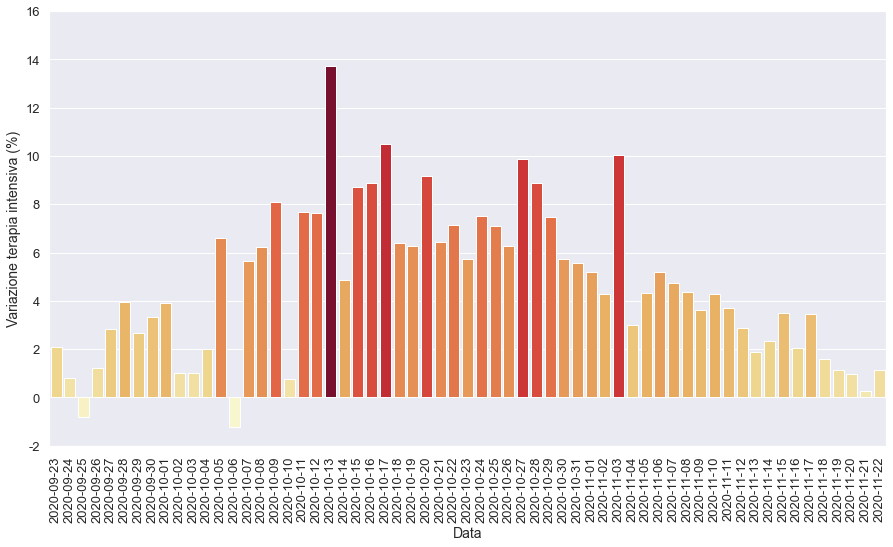

In [15]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

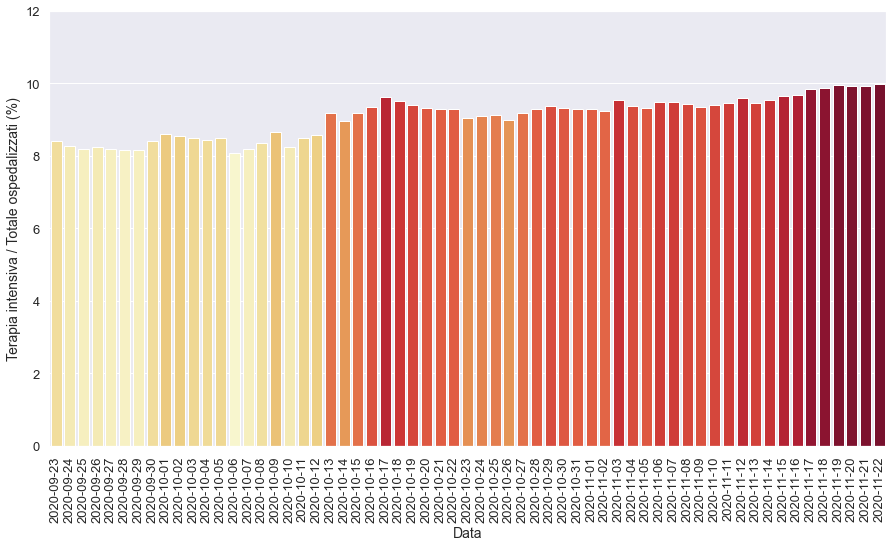

In [16]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

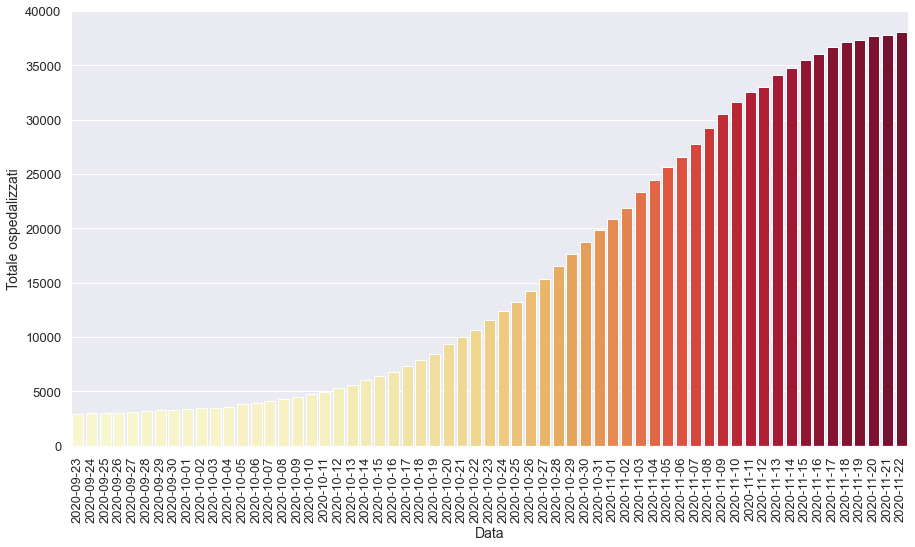

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

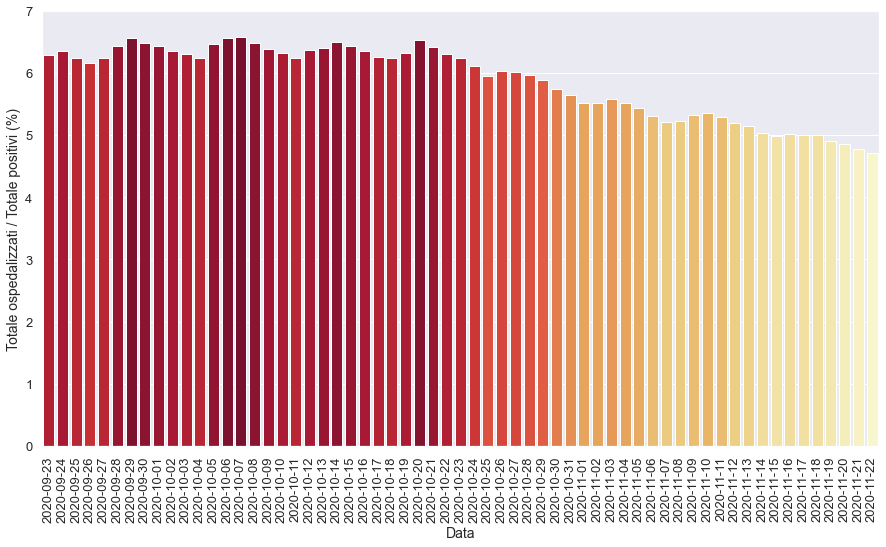

In [18]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

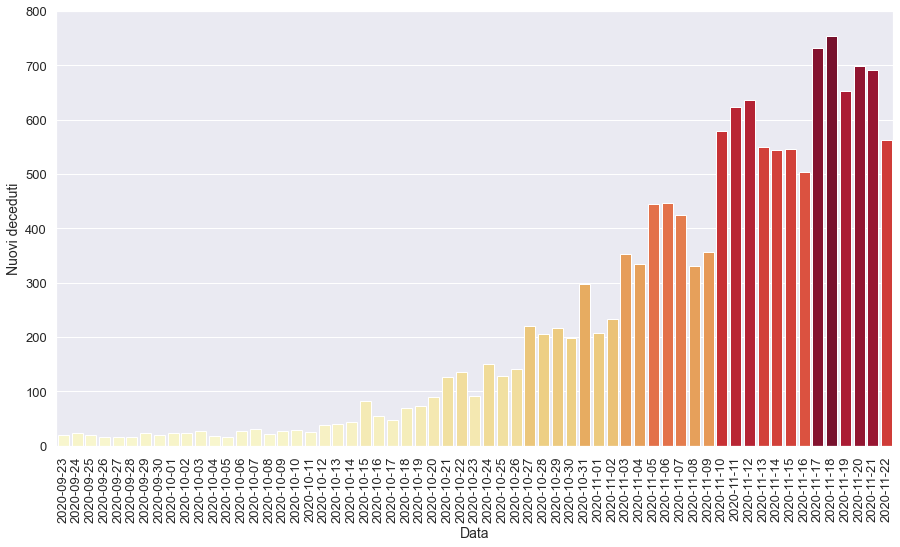

In [19]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

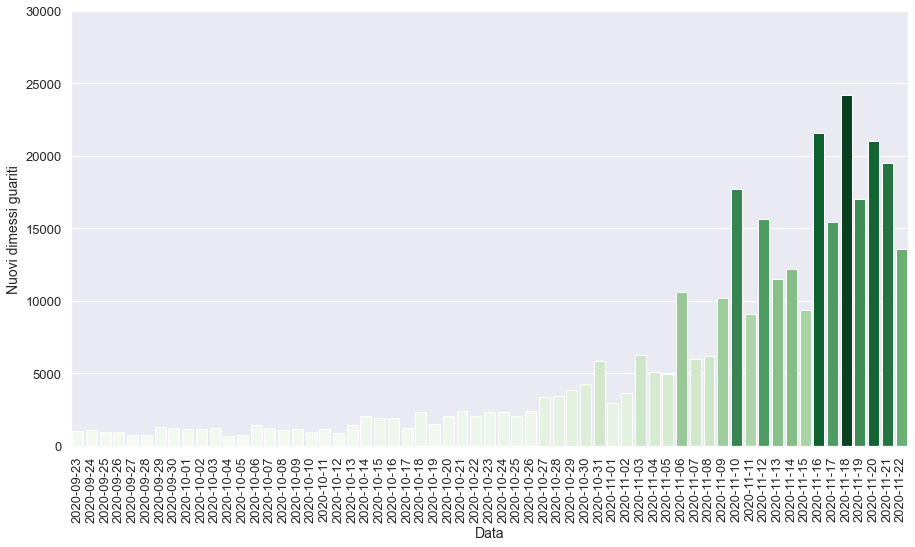

In [20]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [21]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n;

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-23T17:00:00,10549,1049,11598,174404,186002,16700,19143,261808,37059,...,2352.0,91.0,182032.0,114499.0,9.04,6.24,10.52,16.72,5.75,11.307
1,2020-10-24T17:00:00,11287,1128,12415,190767,203182,17180,19644,264117,37210,...,2309.0,151.0,177669.0,109673.0,9.09,6.11,11.06,17.91,7.53,10.561
2,2020-10-25T17:00:00,12006,1208,13214,209027,222241,19059,21273,266203,37338,...,2086.0,128.0,161880.0,101876.0,9.14,5.95,13.14,20.88,7.09,10.470
3,2020-10-26T17:00:00,12997,1284,14281,222403,236684,14443,17012,268626,37479,...,2423.0,141.0,124686.0,78816.0,8.99,6.03,13.64,21.58,6.29,7.655
4,2020-10-27T17:00:00,13955,1411,15366,239724,255090,18406,21994,271988,37700,...,3362.0,221.0,174398.0,106346.0,9.18,6.02,12.61,20.68,9.89,9.293
5,2020-10-28T17:00:00,14981,1536,16517,259940,276457,21367,24991,275404,37905,...,3416.0,205.0,198952.0,121820.0,9.30,5.97,12.56,20.51,8.86,9.797
6,2020-10-29T17:00:00,15964,1651,17615,281576,299191,22734,26831,279282,38122,...,3878.0,217.0,201452.0,118857.0,9.37,5.89,13.32,22.57,7.49,9.705
7,2020-10-30T17:00:00,16994,1746,18740,307046,325786,26595,31084,283567,38321,...,4285.0,199.0,215085.0,129688.0,9.32,5.75,14.45,23.97,5.75,10.390
8,2020-10-31T17:00:00,17966,1843,19809,331577,351386,25600,31758,289426,38618,...,5859.0,297.0,215886.0,132279.0,9.30,5.64,14.71,24.01,5.56,9.748
9,2020-11-01T17:00:00,18902,1939,20841,357288,378129,26743,29907,292380,38826,...,2954.0,208.0,183457.0,117478.0,9.30,5.51,16.30,25.46,5.21,8.511


In [22]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

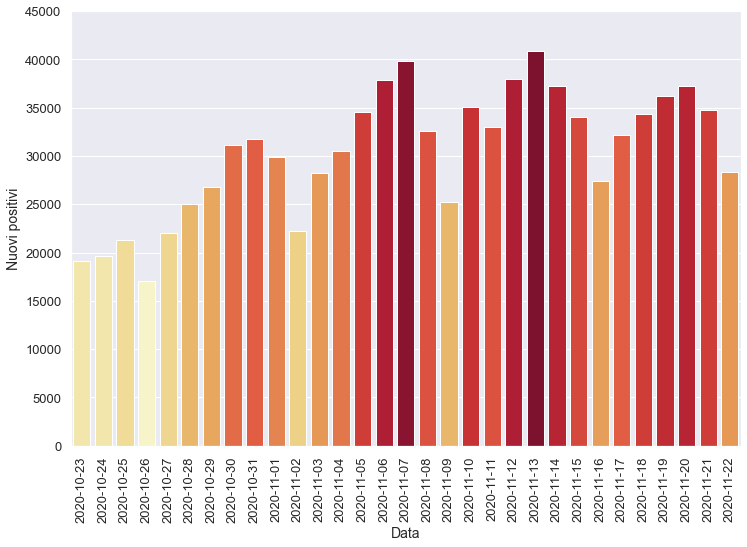

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

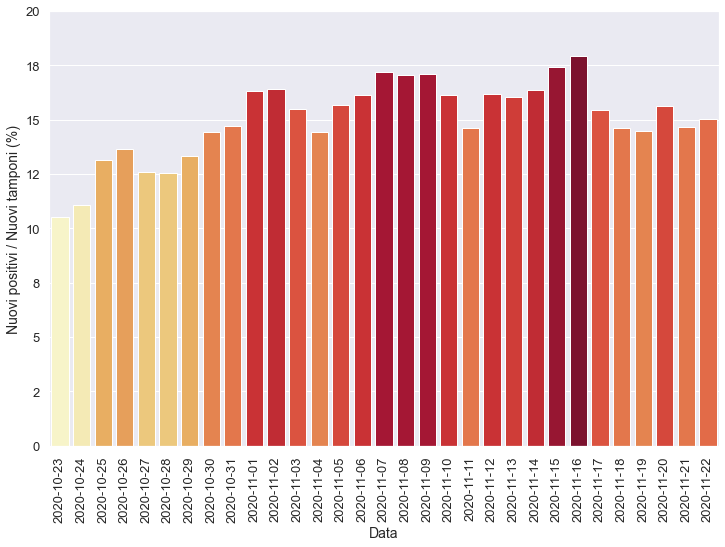

In [24]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

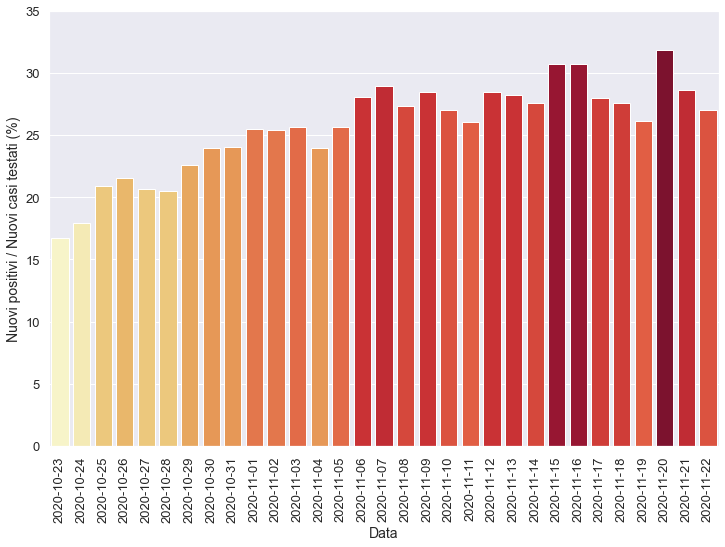

In [25]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

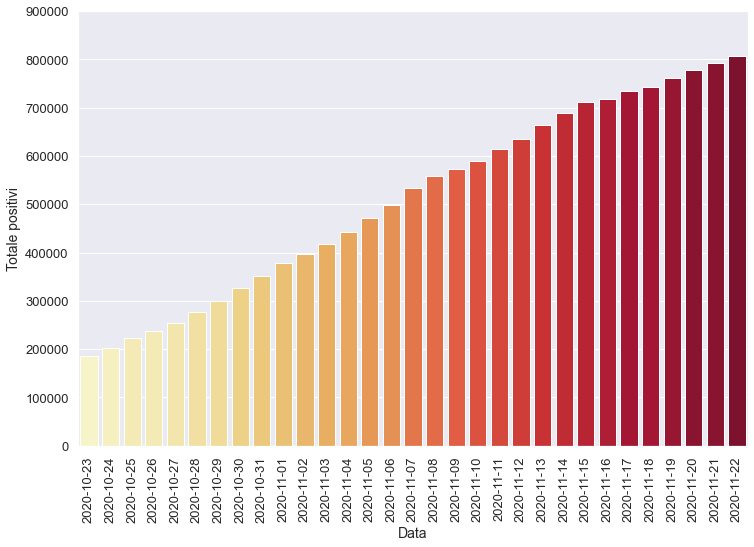

In [26]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

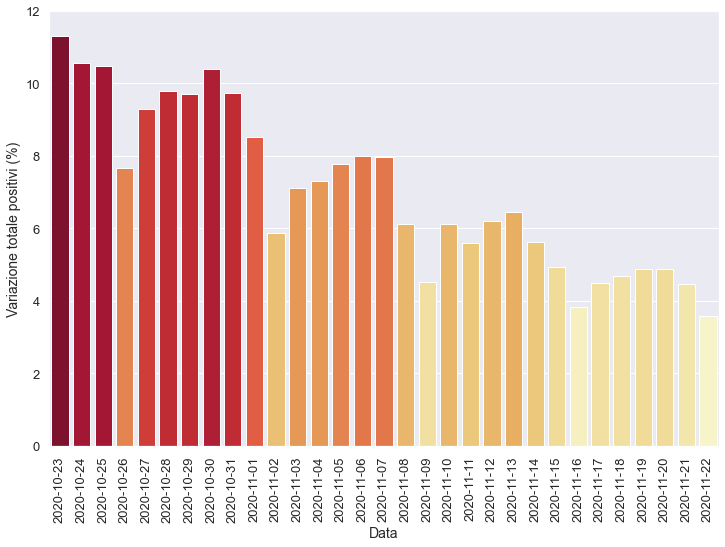

In [27]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

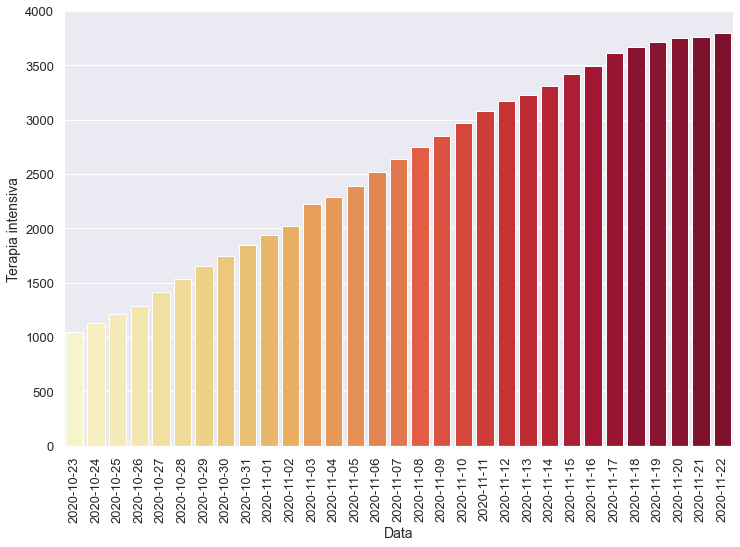

In [28]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

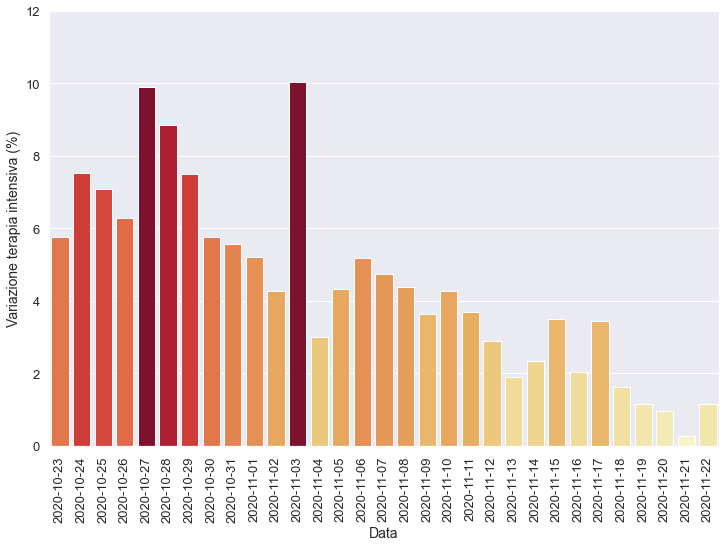

In [29]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

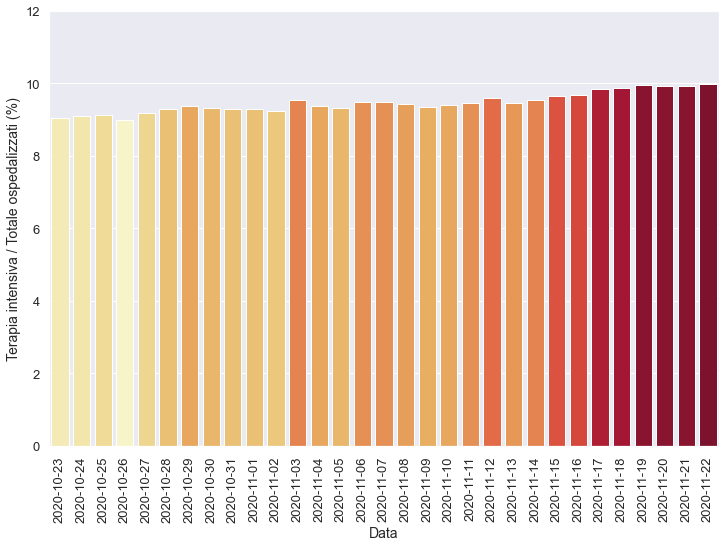

In [30]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

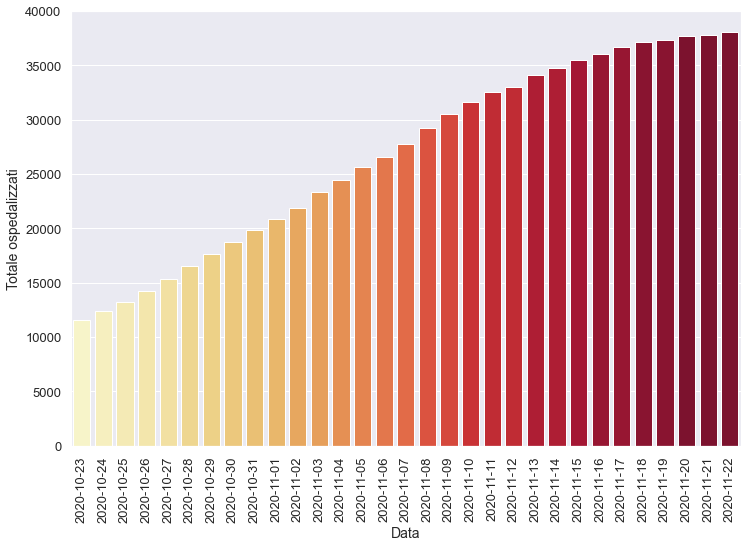

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

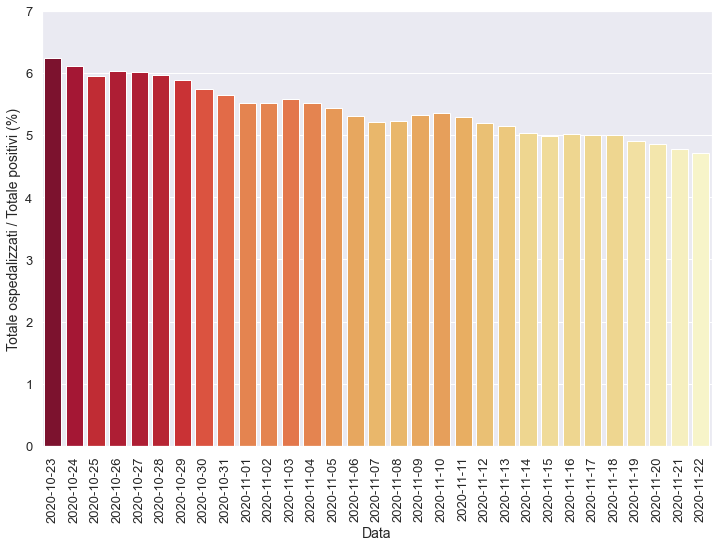

In [32]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

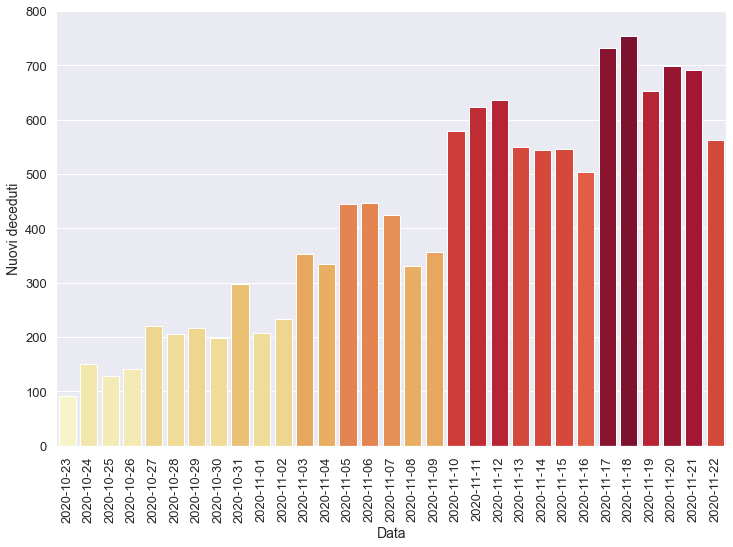

In [33]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

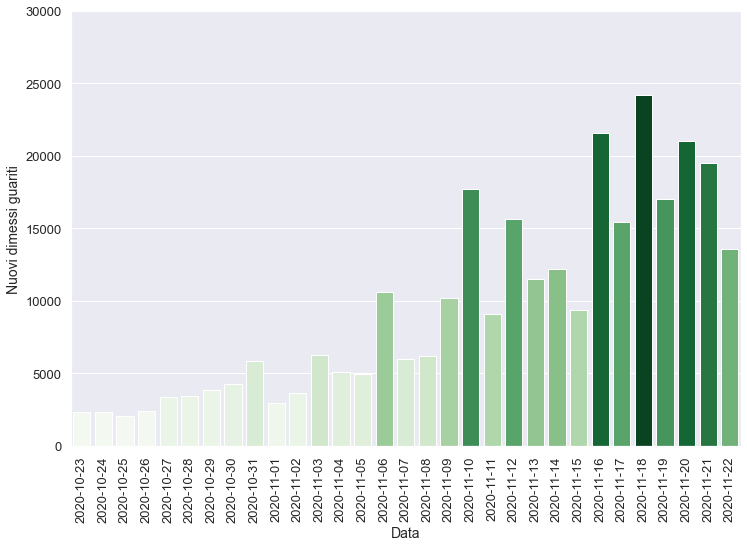

In [34]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [35]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df_n = df_n_raw[df_n_raw.data > date_threshold_str].reset_index(drop=True)
df_n

,data,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,nuovi_dimessi_guariti,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-15T17:00:00,32047,3422,35469,677021,712490,24055,33979,420810,45229,...,9376.0,546.0,195275.0,110731.0,9.65,4.98,17.40,30.69,3.51,4.936
1,2020-11-16T17:00:00,32536,3492,36028,681756,717784,5294,27354,442364,45733,...,21554.0,504.0,152663.0,89082.0,9.69,5.02,17.92,30.71,2.05,3.839
2,2020-11-17T17:00:00,33074,3612,36686,697124,733810,16026,32191,457798,46464,...,15434.0,731.0,208458.0,114933.0,9.85,5.00,15.44,28.01,3.44,4.485
3,2020-11-18T17:00:00,33504,3670,37174,705994,743168,9358,34282,481967,47217,...,24169.0,753.0,234834.0,124237.0,9.87,5.00,14.60,27.59,1.61,4.672
4,2020-11-19T17:00:00,33610,3712,37322,724349,761671,18503,36176,498987,47870,...,17020.0,653.0,250186.0,138397.0,9.95,4.90,14.46,26.14,1.14,4.868
5,2020-11-20T17:00:00,33957,3748,37705,739471,777176,15505,37242,520022,48569,...,21035.0,699.0,238077.0,116853.0,9.94,4.85,15.64,31.87,0.97,4.890
6,2020-11-21T17:00:00,34063,3758,37821,753925,791746,14570,34767,539524,49261,...,19502.0,692.0,237225.0,121315.0,9.94,4.78,14.66,28.66,0.27,4.474
7,2020-11-22T17:00:00,34279,3801,38080,767867,805947,14201,28337,553098,49823,...,13574.0,562.0,188747.0,104861.0,9.98,4.72,15.01,27.02,1.14,3.579


In [36]:
bp.df = df_n
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

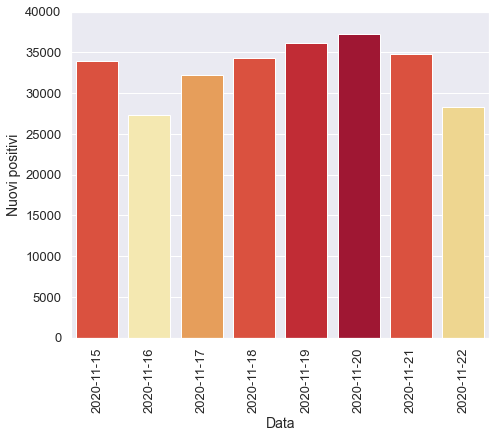

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

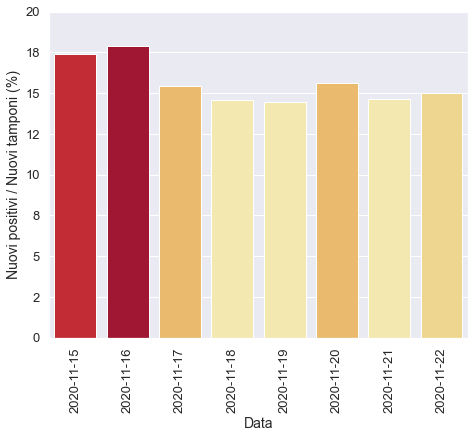

In [38]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

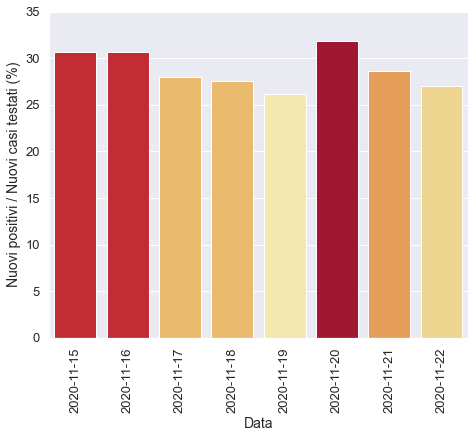

In [39]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

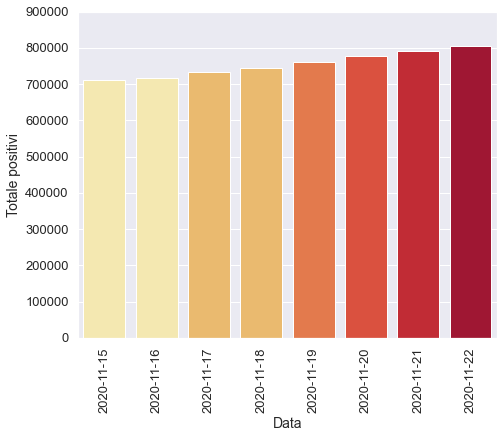

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

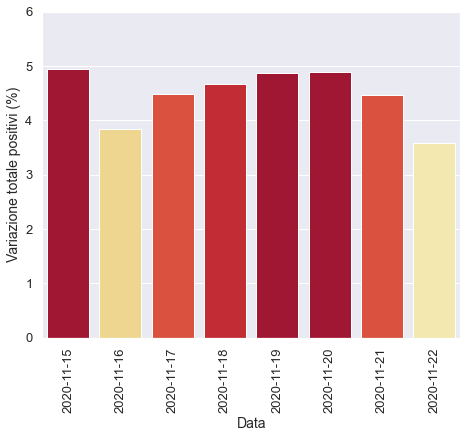

In [41]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

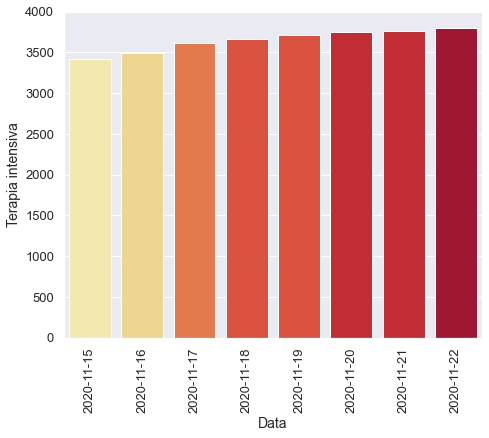

In [42]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

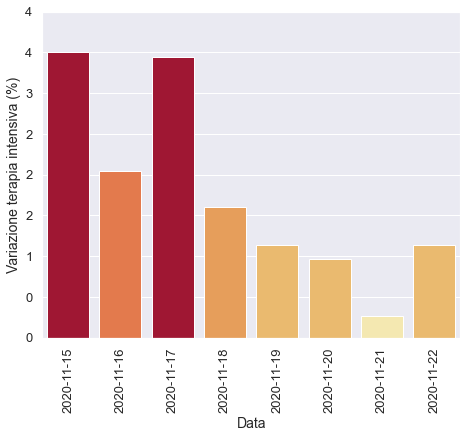

In [43]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

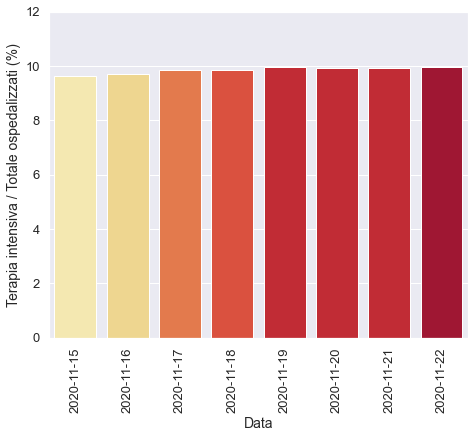

In [44]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

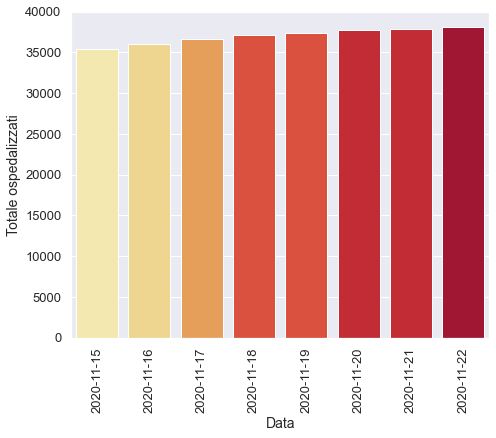

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

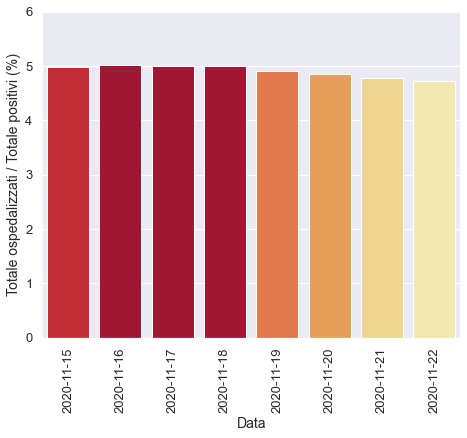

In [46]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

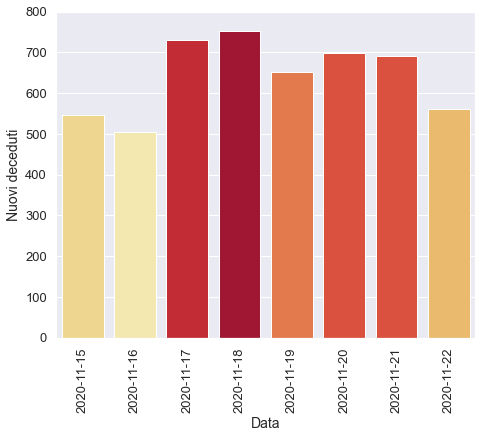

In [47]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

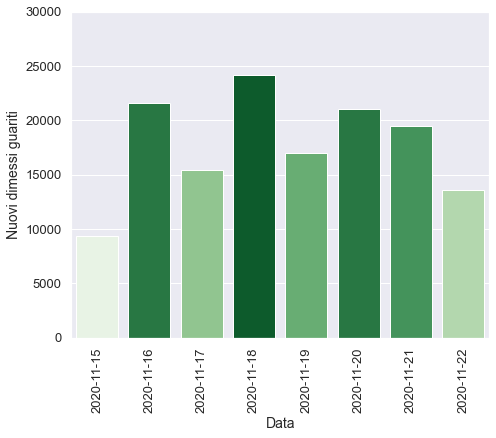

In [48]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)